In [25]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../../project")

from common.torch_utils import module_is_trainable
import torch
import torch.nn as nn
import networkx as nx
import torch.nn.utils.prune as prune
import matplotlib.pyplot as plt

from common.nxutils import *
from common.constants import *
from common import testutils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


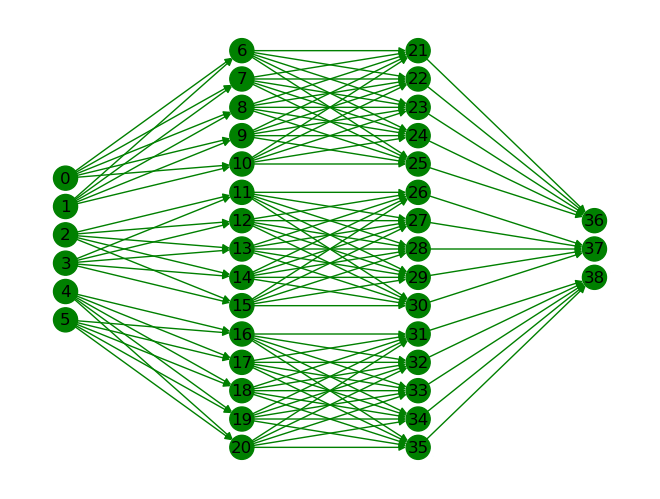

In [26]:
task_in_size=2
task_out_size=1
task_description = (
    ('moons' , (task_in_size, task_out_size)), 
    ('circles', (task_in_size, task_out_size)), 
    ('spirals', (task_in_size, task_out_size))
)
num_tasks = len(task_description)
shape = [
    task_in_size*num_tasks,
    5*num_tasks,
    5*num_tasks,
    task_out_size*num_tasks
]

model = testutils.BaseModel(shape, init_bias_zero=True)
model = testutils.make_splitable_model(model, num_tasks, tile_offset= 0)
GraphManager(model, shape, task_description).plot()


INITIAL STATE


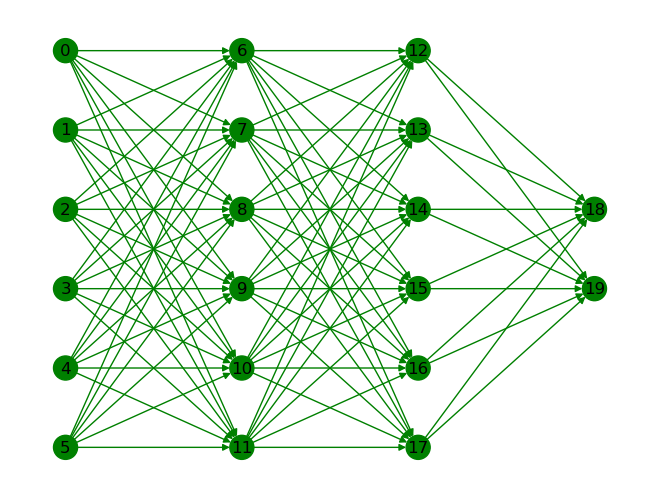

unproductive :0 []
zomb :0 []
START PRUNING
------------------------------ it 0 begin ------------------------------ 
update the graph manager
#subnets : 1
[[1. 1.]
 [0. 0.]]
potential : 1.0, full=True
print info
unproductive :0 []
zomb :0 []
plot the model


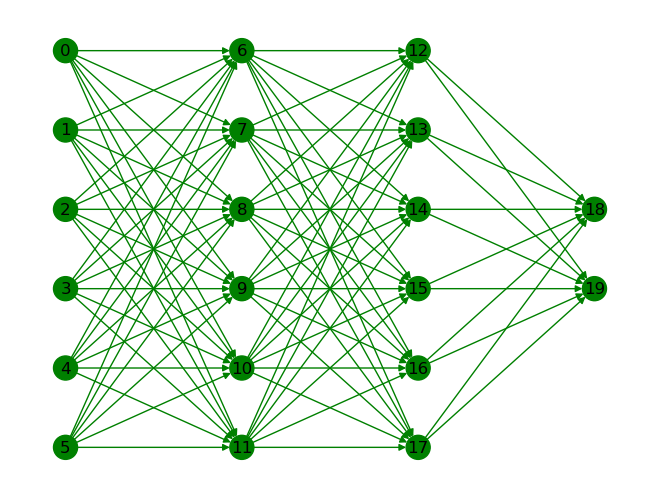

prune the network
------------------------------ it 0 end ------------------------------ 
------------------------------ it 1 begin ------------------------------ 
update the graph manager
#subnets : 1
[[1. 1.]
 [0. 0.]]
potential : 1.0, full=True
print info
unproductive :0 []
zomb :0 []
plot the model


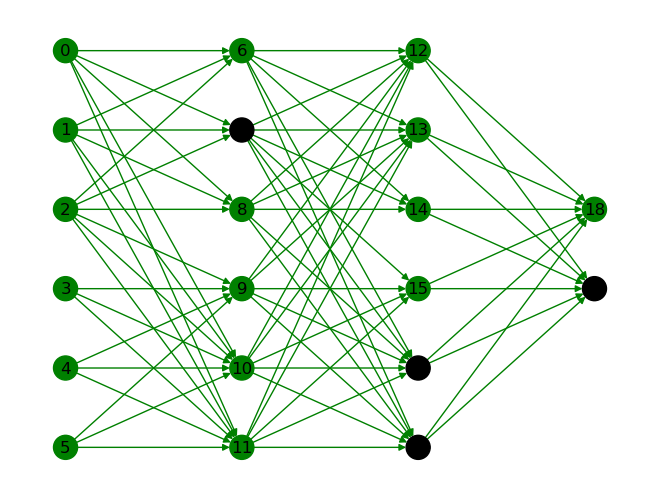

prune the network
------------------------------ it 1 end ------------------------------ 
------------------------------ it 2 begin ------------------------------ 
update the graph manager
#subnets : 1
[[1. 1.]
 [0. 0.]]
potential : 1.0, full=True
print info
unproductive :0 []
zomb :0 []
plot the model


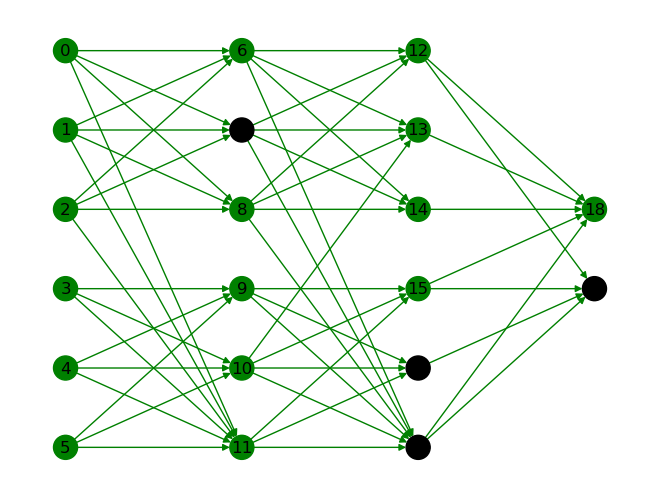

prune the network
------------------------------ it 2 end ------------------------------ 
------------------------------ it 3 begin ------------------------------ 
update the graph manager
#subnets : 2
[[1. 0.]
 [0. 1.]]
potential : 1.0, full=True
print info
unproductive :0 []
zomb :0 []
plot the model


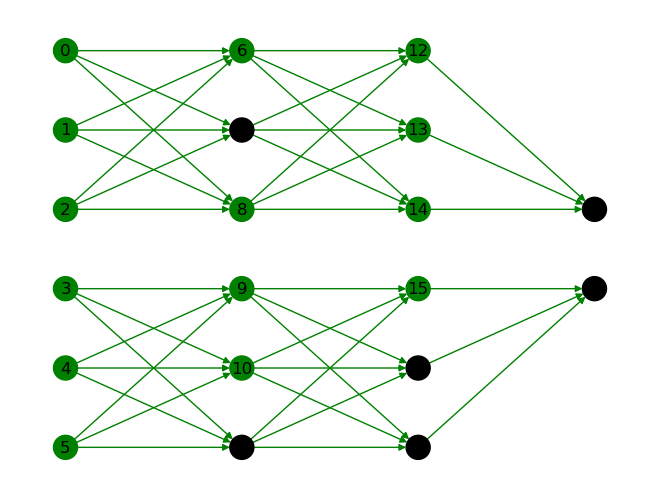

prune the network
------------------------------ it 3 end ------------------------------ 
------------------------------ it 4 begin ------------------------------ 
update the graph manager
#subnets : 2
[[1. 0.]
 [0. 1.]]
potential : 1.0, full=True
print info
unproductive :0 []
zomb :0 []
plot the model


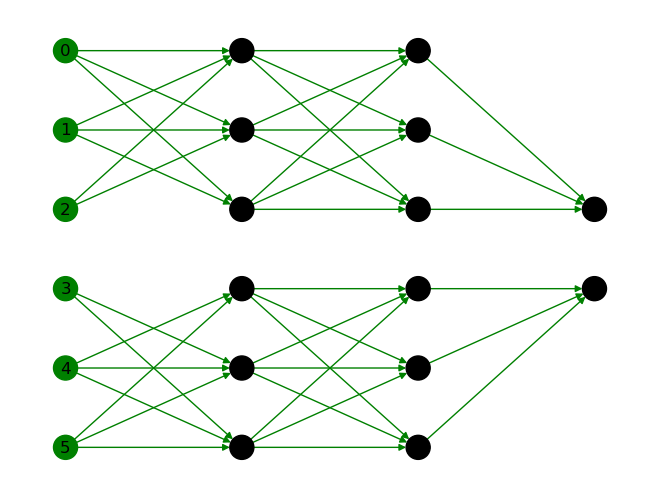

prune the network
------------------------------ it 4 end ------------------------------ 
------------------------------ it 5 begin ------------------------------ 
update the graph manager
not all nodes in this graph are alive
#subnets : 2
[[0. 1.]
 [0. 0.]]
potential : 0.5, full=False
print info
unproductive :12 [(6, 12), (6, 13), (6, 14), (7, 12), (7, 13), (7, 14), (8, 12), (8, 13), (8, 14), (12, 18), (13, 18), (14, 18)]
zomb :0 []
plot the model


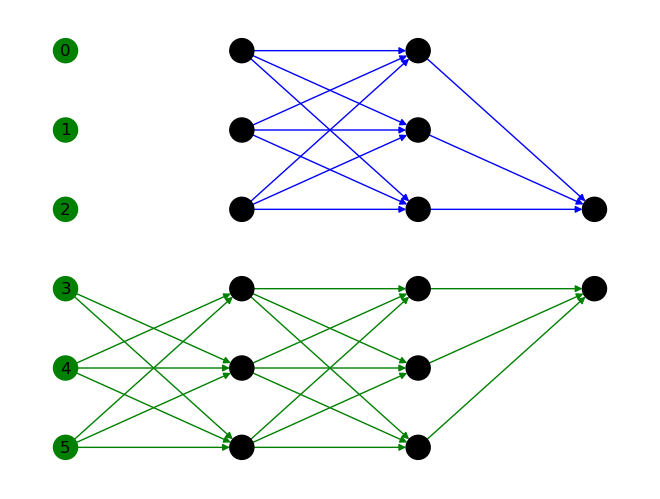

prune the network
------------------------------ it 5 end ------------------------------ 
------------------------------ it 6 begin ------------------------------ 
update the graph manager
not all nodes in this graph are alive
not all nodes in this graph are alive
#subnets : 2
[[0.         0.66666667]
 [0.         0.        ]]
potential : 0.3333333333333333, full=False
print info
unproductive :18 [(6, 12), (6, 13), (6, 14), (7, 12), (7, 13), (7, 14), (8, 12), (8, 13), (8, 14), (9, 15), (9, 16), (9, 17), (10, 15), (10, 16), (10, 17), (12, 18), (13, 18), (14, 18)]
zomb :0 []
plot the model


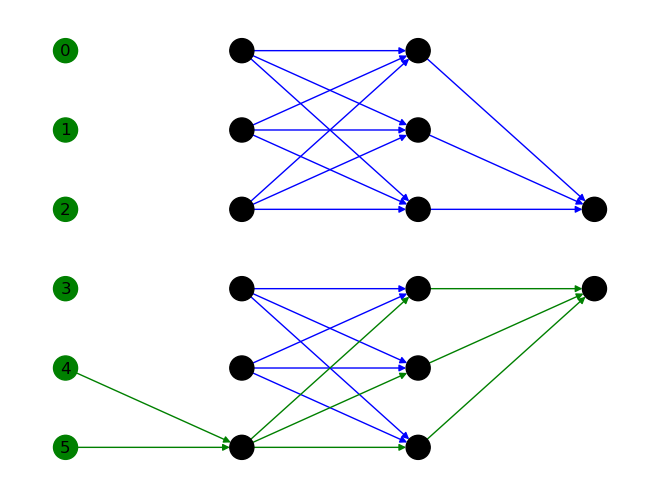

prune the network
------------------------------ it 6 end ------------------------------ 
------------------------------ it 7 begin ------------------------------ 
update the graph manager
not all nodes in this graph are alive
not all nodes in this graph are alive
#subnets : 2
[[0. 0.]
 [0. 0.]]
potential : 0.0, full=False
print info
unproductive :21 [(6, 13), (6, 14), (7, 13), (7, 14), (8, 13), (8, 14), (9, 15), (9, 16), (9, 17), (10, 15), (10, 16), (10, 17), (11, 15), (11, 16), (11, 17), (12, 18), (13, 18), (14, 18), (15, 19), (16, 19), (17, 19)]
zomb :0 []
plot the model


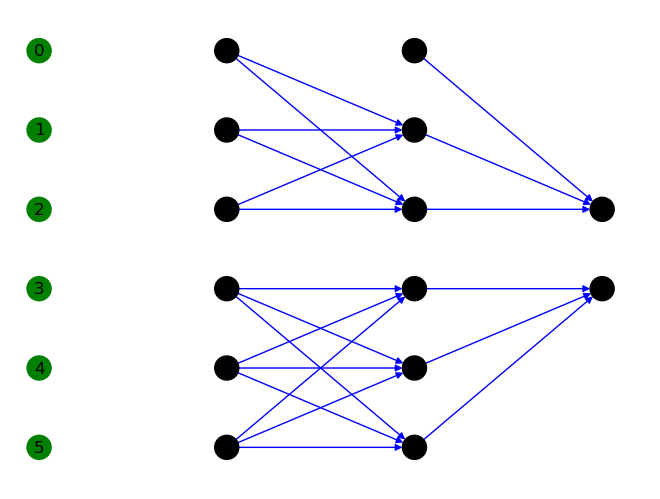

prune the network
------------------------------ it 7 end ------------------------------ 
------------------------------ it 8 begin ------------------------------ 
update the graph manager
not all nodes in this graph are alive
not all nodes in this graph are alive
#subnets : 2
[[0. 0.]
 [0. 0.]]
potential : 0.0, full=False
print info
unproductive :17 [(7, 14), (8, 14), (9, 15), (9, 16), (9, 17), (10, 15), (10, 16), (10, 17), (11, 15), (11, 16), (11, 17), (12, 18), (13, 18), (14, 18), (15, 19), (16, 19), (17, 19)]
zomb :0 []
plot the model


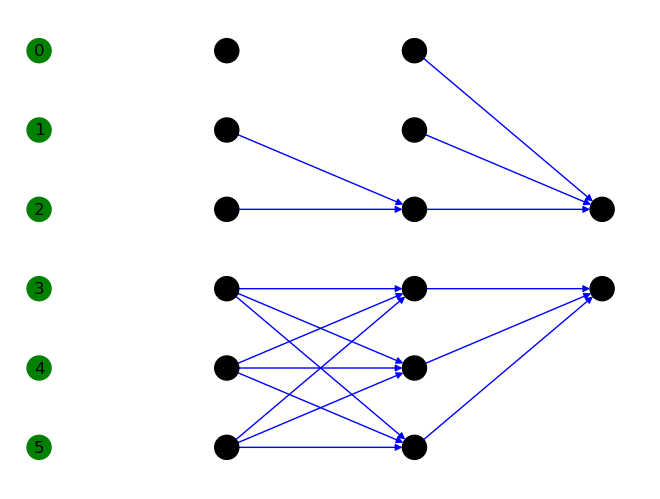

prune the network
------------------------------ it 8 end ------------------------------ 


In [27]:
torch.manual_seed(1)

shape = (6,6,6,2)
task_description = ('moons' , (3, 1)), ('circles', (3, 1))
num_tasks = len(task_description)

model = testutils.BaseModel(shape, init_bias_zero=False)
model = testutils.make_splitable_model(model, num_tasks, tile_offset= 0.1)
modules = [m for m in model.modules if module_is_trainable(m)]

params = []
params.extend([(module, 'weight') for module in modules])
params.extend([(module, 'bias') for module in modules])

gm = GraphManager(model, shape, task_description)

print(f'INITIAL STATE')
gm.plot()
gm.print_info()

print(f'START PRUNING')
for i in range(9):
    print(f'{"-"*30} it {i} begin {"-"*30} ')

    print(f'update the graph manager')
    gm.update(model)

    print(f'print info')
    gm.print_info()

    print('plot the model')
    gm.plot()

    #print_bias_pruned(model, 0)
    #print_bias_pruned(model, 2)
    # print_bias_pruned(model, 4)
    print('prune the network')
    prune.global_unstructured(
        parameters=params, 
        pruning_method=prune.L1Unstructured, 
        amount=0.2
    )
    print(f'{"-"*30} it {i} end {"-"*30} ')


In [28]:
from common.testutils import *

In [29]:
make_splitable_model()

TypeError: make_splitable_model() missing 2 required positional arguments: 'model' and 'num_tasks'